In [32]:
# Importing the libraries

import os
import sys



import pycharmm
import pycharmm.psf as psf
import pycharmm.read as read
import pycharmm.write as write
import pycharmm.settings as settings
import pycharmm.lingo as lingo

from pycharmm.lib import charmm as libcharmm

In [22]:
# Load the topology files using pyCHARMM  
read.stream('toppar.str')

  
 CHARMM>     stream toppar.str
 VOPEN> Attempting to open::toppar.str::
 OPNLGU> Unit 99 opened for READONLY access to toppar.str

                    INPUT STREAM SWITCHING TO UNIT    99
 RDTITL> * GENERATED BY CHARMM-GUI (HTTP://WWW.CHARMM-GUI.ORG) V3.7 ON AUG, 07. 2023. JOBID=9141926248
 RDTITL> * STREAM FILE FOR TOPOLOGY AND PARAMETER READING
 RDTITL> *
 Parameter: IN1 <- "" <empty>
  
 CHARMM>     
  
 CHARMM>    ! protein topology and parameter
 CHARMM>    open read card unit 10 name toppar/top_all36_prot.rtf
 OPNLGU> Unit already open. The old file will be closed first.
 VCLOSE: Closing unit   10 with status "KEEP"
 VOPEN> Attempting to open::toppar/top_all36_prot.rtf::
 OPNLGU> Unit 10 opened for READONLY access to toppar/top_all36_prot.rtf
  
 CHARMM>    read  rtf card unit 10
 MAINIO> Residue topology file being read from unit  10.
 TITLE> *>>>>>>>>CHARMM36 ALL-HYDROGEN TOPOLOGY FILE FOR PROTEINS <<<<<<
 TITLE> *>>>>> INCLUDES PHI, PSI CROSS TERM MAP (CMAP) CORRECTION <<<<

In [54]:
# Load the psf file using psf_card in pyCHARMM

read.psf_card('traj.psf')
psf.get_nres()

  
 CHARMM>     read psf card -
 CHARMM>     name traj.psf
 VOPEN> Attempting to open::traj.psf::
 MAINIO> Protein structure file being read from unit  91.
 PSFRD2> Reading PSF in the expanded format.
 TITLE>  *PSF FILE
 TITLE>  *  DATE:    11/11/22     13:27:48      CREATED BY USER: raafik
 TITLE>  *
 PSFSUM> PSF modified: NONBOND lists and IMAGE atoms cleared.
 PSFSUM> Summary of the structure file counters :
         Number of segments      =        1   Number of residues   =      214
         Number of atoms         =     3342   Number of groups     =      982
         Number of bonds         =     3366   Number of angles     =     6125
         Number of dihedrals     =     8925   Number of impropers  =      565
         Number of cross-terms   =      212
         Number of HB acceptors  =      322   Number of HB donors  =      377
         Number of NB exclusions =        0   Total charge =   -3.00000
 VCLOSE: Closing unit   91 with status "KEEP"
  
 CHARMM>     
  


214

In [50]:
#Define the input and output files
#Input: trajectory file
#Output: order parameter file

indcd = 'traj.dcd' 
outdat = 'order.dat'


#CHARMM units are used to read and write files
pycharmm.lingo.charmm_script('open unit 21 write form name ' + outdat ) 
pycharmm.lingo.charmm_script('open unit 62 read unform name ' + indcd )

#Print Trajectory Information
pycharmm.lingo.charmm_script('TRAJectory QUERy UNIT 62')

  
 CHARMM>     open unit 21 write form name order.dat
 OPNLGU> Unit already open. The old file will be closed first.
 VCLOSE: Closing unit   21 with status "KEEP"
 VOPEN> Attempting to open::order.dat::
 OPNLGU> Unit 21 opened for WRITE access to order.dat
  
  
 CHARMM>     open unit 62 read unform name traj.dcd
 OPNLGU> Unit already open. The old file will be closed first.
 VCLOSE: Closing unit   62 with status "KEEP"
 VOPEN> Attempting to open::traj.dcd::
 OPNLGU> Unit 62 opened for READONLY access to traj.dcd
  
  
 CHARMM>     TRAJectory QUERy UNIT 62

 READING TRAJECTORY FROM UNIT  62
   NUMBER OF COORDINATE SETS IN FILE:        1125
   NUMBER OF PREVIOUS DYNAMICS STEPS:           0
   FREQUENCY FOR SAVING COORDINATES:            1
   NUMBER OF STEPS FOR CREATION RUN:         1125

   NUMBER OF DEGREES OF FREEDOM:                0
   NUMBER OF FIXED ATOMS:                       0
   THE INTEGRATION TIME STEP (PS):      0.0489
   THE FILE CONTAINS CRYSTAL UNIT CELL DATA
   THE FI

1

In [53]:
#CHARMM STtream File Generation for NMR Module, Set options for NMR module
nmr_stream = '''* NMR Order Parameter Calculation       !!Stream File Title
*                                                       !! Syntax Requirement
                                                        !! Blank line, Syntax Requirement    
NMR                                                     !! NMR module Start    
reset
rtimes sele atom * * N end sele atom * * HN end         !! Select the atoms to calculate the order parameter
dyna firstu 62 -                                        !! unit number to read from (same as dcd unit)
nunit 1 -                                               !! number of units to read
begin 1 -                                               !! first frame to read
stop 1124 -                                             !! last frame to read
skip 1 -                                                !! read every skip frames
tmax 3.0 -                                              !! maximum time for correlation function
cut 2.0 -                                               !! cut-off for correlation function
ilist 21 -                                              !! unit number to write to (same as outdat unit)
dsigma -160.0 C(t)                                      !! correlation function
end                                                     !! End of NMR module ! More option can be seen from the documentation
'''
with open('nmr.str', 'w') as f:
    f.write(nmr_stream)

# Running NMR Module via read option in pyCHARMM
read.stream('nmr.str')

  
 CHARMM>     stream nmr.str
 VOPEN> Attempting to open::nmr.str::
 OPNLGU> Unit 99 opened for READONLY access to nmr.str

                    INPUT STREAM SWITCHING TO UNIT    99
 RDTITL> * NMR ORDER PARAMETER CALCULATION
 RDTITL> *
 Parameter: IN1 <- "" <empty>
  
 CHARMM>                                                            !! Blank line, Syntax Requirement
  
 CHARMM>    NMR                                                     !! NMR module Start

      NMR ANALYSIS SUBROUTINE
  
    NMR>    reset
      NMR RESET TO ZERO
  
    NMR>    rtimes sele atom * * N end sele atom * * HN end         !! Select the atoms to calculate the order parameter

      NMR PROPERTY:  DIPOLE-DIPOLE RELAXATION TIMES
      HFIELD [TESLA] =           11.740 RTUMBL [PSEC]  =            0.000

      SPIN LIST:
 SELRPN>    214 atoms have been selected out of   3342
 SELRPN>    203 atoms have been selected out of   3342
      N        MET      PROA     1          GAMMA= -0.2710D+08 OMEGA [MHz]= -50.636

     0.196      0.9292
     0.244      0.9266
     0.293      0.9295
     0.342      0.9270
     0.391      0.9277
     0.440      0.9294
     0.489      0.9304
     0.538      0.9311
     0.587      0.9294
     0.636      0.9230
     0.684      0.9263
     0.733      0.9250
     0.782      0.9217
     0.831      0.9237
     0.880      0.9249
     0.929      0.9278
     0.978      0.9225
     1.027      0.9260
     1.076      0.9228
     1.124      0.9264
     1.173      0.9253
     1.222      0.9233
     1.271      0.9207
     1.320      0.9214
     1.369      0.9247
     1.418      0.9216
     1.467      0.9211
     1.516      0.9246
     1.564      0.9208
     1.613      0.9246
     1.662      0.9190
     1.711      0.9199
     1.760      0.9217
     1.809      0.9193
     1.858      0.9246
     1.907      0.9195
     1.956      0.9236
     2.004      0.9214
     2.053      0.9179
     2.102      0.9188
     2.151      0.9180
     2.200      0.9189
     2.249      0.9177
     2.298 

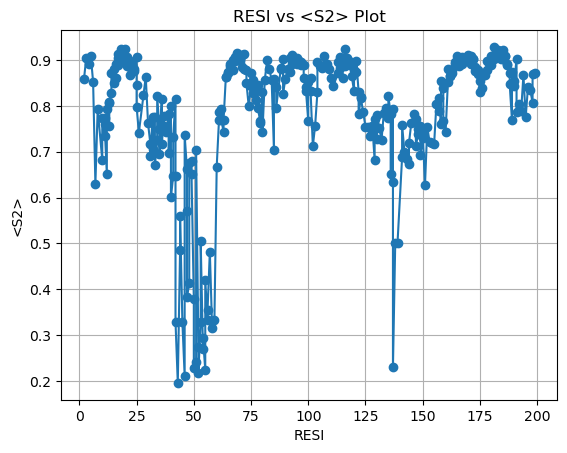

In [52]:
#Plotting the RESI vs <S2> plot from the order.dat file

import numpy as np
import matplotlib.pyplot as plt

# Load data from 'order.dat', skipping the header row
data = np.genfromtxt('order.dat', skip_header=1, usecols=(0, 6), dtype=float, filling_values=np.nan)

# Remove rows with NaN values (rows that had non-numeric data)
data = data[~np.isnan(data).any(axis=1)]

# Extract 'resi' and '<S2>' columns from the data
resi_values = data[:, 0]  # Assuming 'resi' is in the first column (index 0)
s2_values = data[:, 1]     # Assuming '<s2>' is in the second column (index 1)

# Plotting using matplotlib
plt.plot(resi_values, s2_values, marker='o')
plt.xlabel('RESI')
plt.ylabel('<S2>')
plt.title('RESI vs <S2> Plot')
plt.grid(True)
plt.show()